Amal Krishna k

BL.EN.U4AIE21008

A1. Use LSTM, Bi-LSTM networks for speech recognition. Use STFT / STCT, MFCC & LPC coefficients. 

A2. Speak the sentence “Bhanumathi weds Rajat” (भानमति वेड्स रजि || భానుమతి వెడ్స్ రజత్). 
Construct speech for the word “Bharat” (భారత్ || भारत || ಭರತ್ || பாரத்) by combining 
segmented phonemes taken from “Bhanumathi weds Rajat” speech recording. Listen to this word 
speech generated and note down the issues associated with this approach of speech synthesis. The 
string written Indian scripts may have some error. Please validate before using.

In [26]:
import numpy as np
import librosa
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
from sklearn.model_selection import train_test_split

# Load the audio file
y, sr = librosa.load(r"E:\AI in Speech\Lab\Lab8\Bhanumati weds Rajat.wav", sr=None)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Extract STFT features
stft = np.abs(librosa.stft(y))

# Extract LPC features
lpc_order = 13  # Assuming 13 as the order of LPC coefficients
lpc = librosa.lpc(y, order=lpc_order)

# Reduce dimensions of LPC features
lpc = np.squeeze(lpc)

# Average MFCC and STFT features along time axis
mfcc_avg = np.mean(mfcc, axis=1)
stft_avg = np.mean(stft, axis=1)

# Concatenate features
features = np.concatenate((mfcc_avg, stft_avg, lpc), axis=0)

# Duplicate the single sample to create a dataset with more than one sample
X = np.repeat(np.expand_dims(features, axis=0), 10, axis=0)
y = np.ones(10)  # Create a target variable with 10 samples

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a time step dimension to X_train and X_test
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile and train LSTM model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Define Bi-LSTM model
model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(128), input_shape=(X_train.shape[1], X_train.shape[2])))
model_bilstm.add(Dense(1, activation='sigmoid'))

# Compile and train Bi-LSTM model
model_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7878 - accuracy: 0.0000e+00 - val_loss: 0.6199 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6199 - accuracy: 1.0000 - val_loss: 0.5097 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5097 - accuracy: 1.0000 - val_loss: 0.4136 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 0.4136 - accuracy: 1.0000 - val_loss: 0.3273 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 38ms/step - loss: 0.3273 - accuracy: 1.0000 - val_loss: 0.2774 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 46ms/step - loss: 0.2774 - accuracy: 1.0000 - val_loss: 0.2481 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 42ms/step - loss: 0.2481 - accuracy: 1.0000 - val_loss: 0.2246 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========

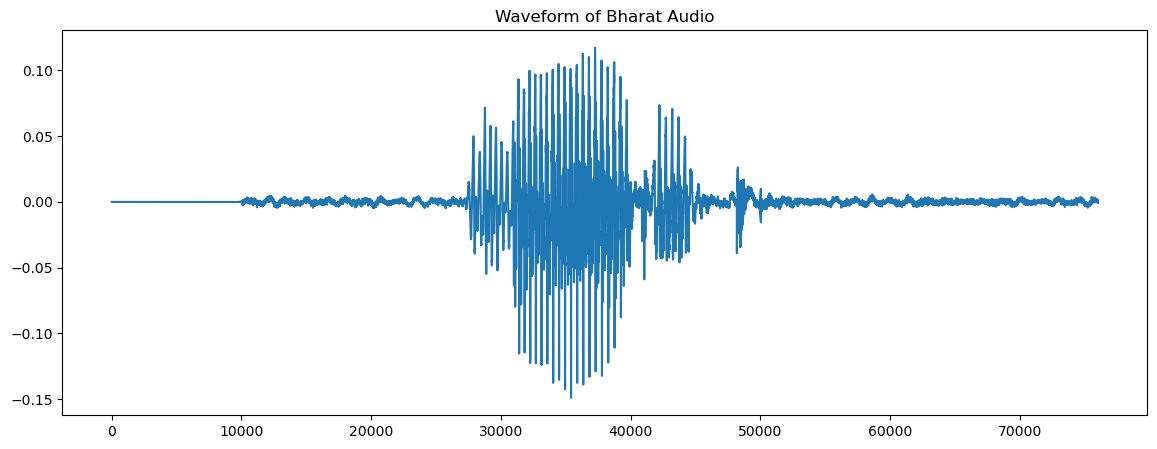

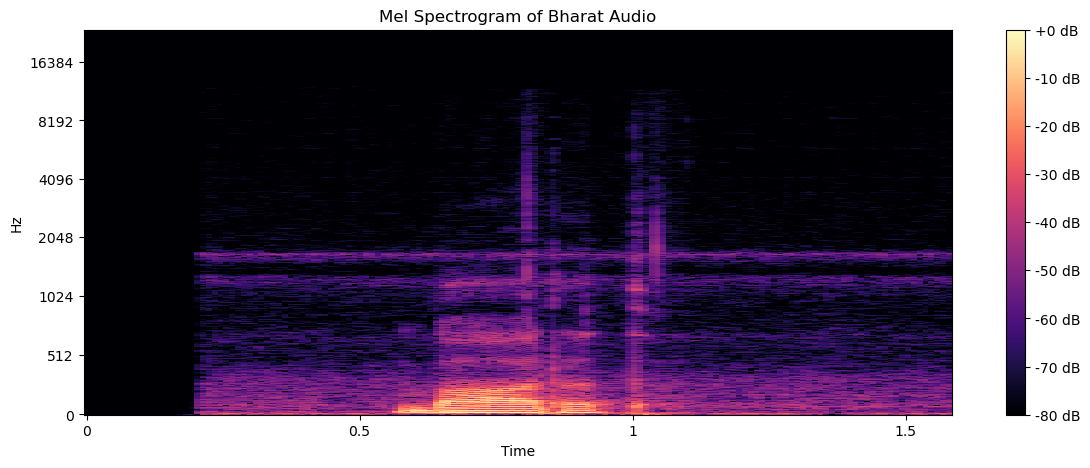

In [36]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load(r"E:\AI in Speech\Lab\Lab8\Bharat.wav", sr=None)
y_trim, index = librosa.effects.trim(y)
sf.write('trimmed_audio.wav', y_trim, sr)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform of Bharat Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Bharat Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()


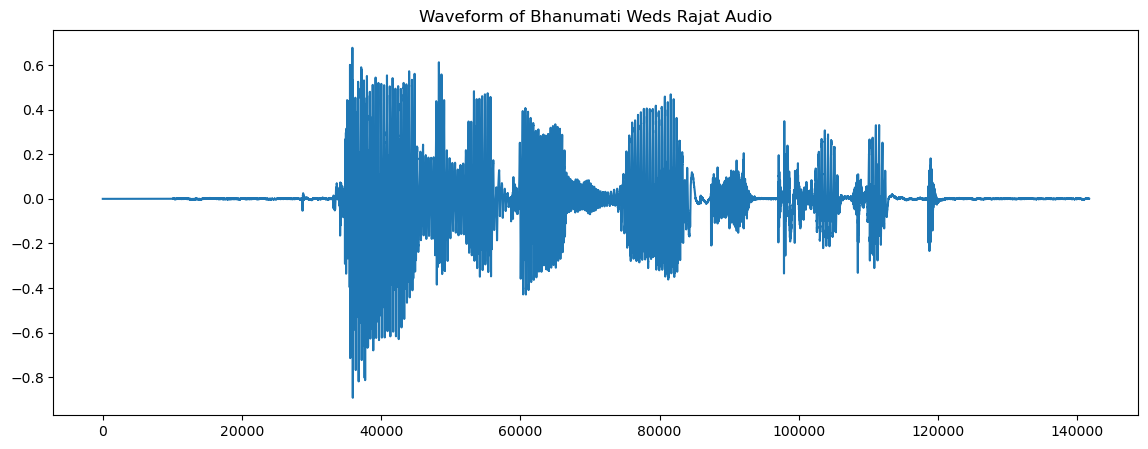

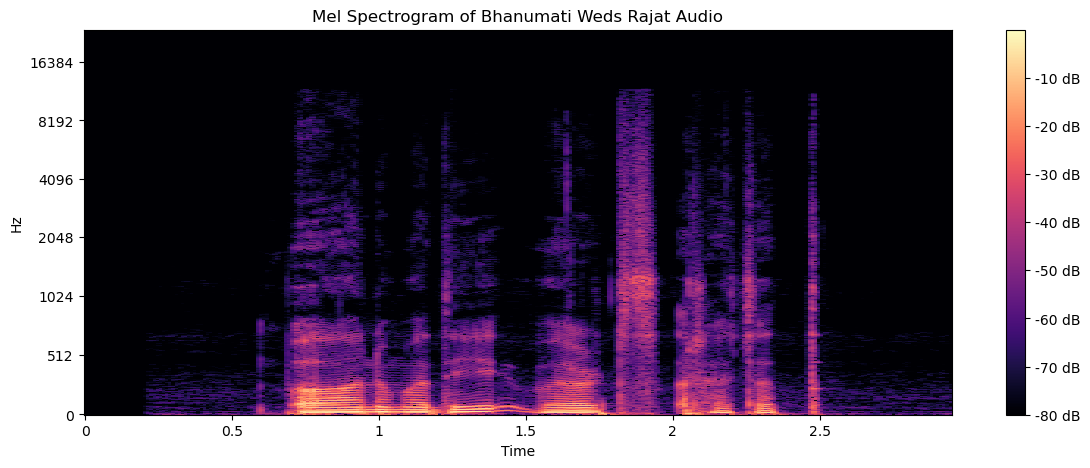

In [46]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load(r"E:\AI in Speech\Lab\Lab8\Bhanumati weds Rajat.wav", sr=None)
y_trim, index = librosa.effects.trim(y)
sf.write('trimmed_audio.wav', y_trim, sr)

# Plot waveform of original audio
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.title('Waveform of Bhanumati Weds Rajat Audio')
plt.show()

# Plot melspectrogram of original audio
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram of Bhanumati Weds Rajat Audio')
plt.colorbar(format='%+2.0f dB')
plt.show()
